In [1]:
import random
import re

import networkx as nx
import numpy as np
import pandas as pd
from karateclub import Graph2Vec
from ogb.graphproppred import GraphPropPredDataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from graphtoolbox.graph_embedding import RandomWalkEmbedder
from graphtoolbox.helpers import OgbDataHelper, GraphHelper

/home/cstaib/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
d_name = 'ogbg-molfreesolv'
dataset = GraphPropPredDataset(name=d_name)
split_idx = dataset.get_idx_split()

X_raw = np.array([data[0] for data in dataset])
target = np.array([data[1] for data in dataset])

In [3]:
ogb_data_helper = OgbDataHelper()
graph_helper = GraphHelper()

In [4]:
extra_d_name = 'ogbg-molhiv'
extra_dataset = GraphPropPredDataset(name=d_name)
extra_split_idx = dataset.get_idx_split()

extra_X_raw = np.array([data[0] for data in dataset])
extra_graphs = np.array([graph_helper.edges_to_nodes(ogb_data_helper.get_nx_graph(x_raw)) for x_raw in X_raw])

/tmp/ipykernel_19368/858231069.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extra_graphs = np.array([graph_helper.edges_to_nodes(ogb_data_helper.get_nx_graph(x_raw)) for x_raw in X_raw])


In [5]:
graphs = np.array([graph_helper.edges_to_nodes(ogb_data_helper.get_nx_graph(x_raw)) for x_raw in X_raw])

/tmp/ipykernel_19368/89424096.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  graphs = np.array([graph_helper.edges_to_nodes(ogb_data_helper.get_nx_graph(x_raw)) for x_raw in X_raw])


In [6]:
how_many_original = len(graphs)
graphs = np.concatenate([graphs, extra_graphs])

In [7]:
embedder = RandomWalkEmbedder(attributed=True)
#embedder = Graph2Vec(attributed=True)

In [8]:
embedder.fit(graphs)
X_embedded = embedder.get_embedding()[:how_many_original]
X_train, X_test, y_train, y_test = train_test_split(X_embedded, target, test_size=0.33)

In [9]:
from sklearn import svm
regressor = svm.SVR()
y_test_predicted = regressor.fit(X_train, y_train).predict(X_test)

/home/cstaib/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


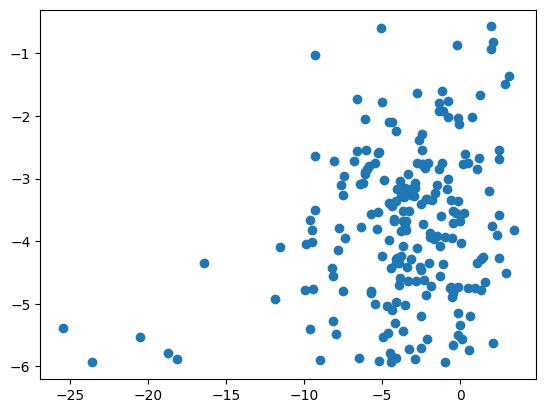

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_predicted)